**Machine Learning** <br/>

**Toolchain Tutorial Part 3 : Data Science Tools** <br/>

Resources:
- https://pandas.pydata.org/docs/reference/index.html
- https://github.com/jvns/pandas-cookbook
- https://python-programming.quantecon.org/pandas.html
- https://elitedatascience.com/python-seaborn-tutorial
- https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Render plots inline
%matplotlib inline

# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

#sns.set_theme(style="darkgrid")

# Data Science Tools

On the following sections we will learn the basics of the packages pandas, seaborn and matplotlib. We need these tools for data handling and data analysis. But first we need to understand the basic idea of data. This this purpose please read the following quotation from *Data Mining*:

"*Data can have diverse formats and can be stored using a variety of different storage modes. At the
most elementary level, a single unit of information is a value of a feature/attribute, where each
feature can take a number of different values. The objects, described by features, are combined
to form data sets, which in turn are stored as flat (rectangular) files and in other formats using
databases and data warehouses.*

*There are two key types of values: numerical and symbolic. Numerical values are expressed by
numbers, for instance, real numbers (–1.09, 123.5), integers (1, 44, 125), prime numbers (1, 3, 5),
etc. In contrast, symbolic values usually describe qualitative concepts such as colors (white, red)
or sizes (small, medium, big).
Features (also known as attributes) are usually described by a set of corresponding values. For
instance, height is usually expressed as a set of real numbers. Features described by both numerical
and symbolic values can be either discrete (categorical) or continuous. Discrete features concern
a situation in which the total number of values is relatively small (finite), while with continuous
features the total number of values is very large (infinite) and covers a specific interval (range).*"

Resource: Data Mining, Krzysztof J. CiosRoman W. SwiniarskiWitold PedryczLukasz A. Kurgan, 2007, Springer Science+Business Media


## 1 Pandas

Pandas is a fast and efficient data analysis tool for Python. Its popularity has increased in recent years, contemporaneous withthe rise of fields such as data science and machine learning. Pandas has already overtaken its competitors by a long way and is now the state of the art tool for data analysis.

Here is a popularity comparison of data analysis tools over time extracted from Stack Overflow Trends:

<img src="images/pandas_vs_rest.png" />

Pandas became popular because of its wide functionality and efficiency. Pandas:
- defines fundamental structures for working with data and
- endows them with methods that facilitate operations such as
    * reading in data
    * adjusting indices
    * working with dates and time series
    * sorting, grouping, re-ordering and general data munging
    * dealing with missing values
    * and a lot more!

You can take a look into the functionality of pandas by reading its API reference: <br>
https://pandas.pydata.org/docs/reference/index.html

Just click on the navigation bar at the left side of the page and get an overview of the functions, especially the DataFrame methods.

This lecture will provide a basic introduction to pandas. If you wish to learn more about pandas, please visit and work through the community tutorial : https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

On the next few section, we will work on a dataset downloaded from the UCI archive. <br>
Link: http://archive.ics.uci.edu/ml/datasets/Auto+MPG

### 1.1 Loading Files
You can read data from a CSV file (or other delimited text files) using the `read_csv()` function. By default, it assumes that the fields are comma-separated. If you want to read CSV files with other type of delimiters, you can use the `sep` argument of the `read_csv()` function.

In [2]:
df = pd.read_csv('data/auto-mpg.data')

The `head()` function allows us to get a quick peak into the data by printing the first 5 rows by default.

In [3]:
df = pd.read_csv('data/auto-mpg.data')
df.head(5)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


As we can see above, the dataframe seems broken. We dont have column names and the data seems not to be comma-seperated by default. <br> Therefore, we need to take a look into the original data format. You can open the file with any kind of text editor.

<img src="images/dataformat.jpg" />

After looking into the file format, we gain the following information:
* the data set has no column names
* the data is seperated by empty spaces
* the last column seems to content comments

With the new gained information we can load the file again by applying following settings to make sure that the data is imported correctly:

* set the column seperator to empty space $\to$  `sep= " "`


* read column names $\to$ `names=cols` (cols is a list containing the column names as elements)


* skip spaces after delimiter $\to$ `skipinitialspace=True`


* ignore lines starting with tabs `\t` $\to$ `comment = '\t'`


In [4]:
# define a list of column names -> column names are taken from the source of the data set :
#                                  http://archive.ics.uci.edu/ml/datasets/Auto+MPG
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

# read .data file again with new settings
df = pd.read_csv('data/auto-mpg.data', 
                 sep= " ",
                 names=cols, 
                 #na_values = "?",
                 skipinitialspace=True,
                 comment = '\t')

In [5]:
df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


Now we successfully imported the data with the pandas `read_csv()` function. When you import/read a file, you get a object called a `DataFrame`. We will talk about this in a moment.

The first thing we have to do is to make a copy of our newly read data set. This is necessary to ensure that the original data is still available unchanged. In the further context we only continue to work with the copy of the data set.

In [6]:
# the copy() function is used to create a copy of the DataFrame df which we got by using the read_csv() function
data = df.copy()


Now lets take a look into the essential pandas data types.

### 1.2 Pandas data types: Series and DataFrame

Pandas contains two important data types defined as `Series` and `DataFrame`. 

A `DataFrame` is an object for storing related columns of a data. You can think of a DataFrame as a table which consists of rows and columns. 

A `Series` is an attribut of a data set. You can think of a Series as a column of data, such as a collection of observations on a single variable. A `Series` is a one-dimensional array with axis-labels.


In [7]:
# lets take a look into the data type of our loaded data set
type(data)

pandas.core.frame.DataFrame

In [8]:
# lets take a look into the data type of a column of our loaded data set
# (we will learn more about column selection later)
type(data['MPG'])

pandas.core.series.Series

#### 1.2.1 Series
Lets start by creating a Series by using the `Series()` function of pandas. We have to write `pd.` in front of `Series()` because we imported the pandas packages as `pd`. This means we made the pandas functionality available under the namespace `pd`.

In [9]:
# a list containing some data
aList = [10, 21, 23, 43, 54, 65]

# creation of a pandas series which contains the list we created above
s = pd.Series(aList, name='test')

# printing the newly created pandas series
s

0    10
1    21
2    23
3    43
4    54
5    65
Name: test, dtype: int64

Here you can imagine the indices `0, 1, 2, 3` as indexing four listed companies, and the values being daily returns on their shares.

In [10]:
# you can use basic math operations on Series
s * 100

0    1000
1    2100
2    2300
3    4300
4    5400
5    6500
Name: test, dtype: int64

In [11]:
# you can also use NumPy functions on Series, such as abs() for absolute values
np.abs(s)

0    10
1    21
2    23
3    43
4    54
5    65
Name: test, dtype: int64

Series can be seen as fast and efficient Python dictionaries, with the restriction that the items in the Series all have the same data type.

#### 1.2.2 DataFrames

While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable/attribute.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized into rows and columns, often with descriptive indexes for individual rows and individual columns.

Now we can use our loaded data set to work further on `DataFrames`. `DataFrames` will be our focus for the rest of the Pandas sections. 

### 1.3 Checking DataFrame Information
You can use the `info()` function to print the information of `DataFrames` which contains the column names, number of elements and data types of entries. It also prints the range of the elements and the required memory usage. For example:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


The information of a DataFrame can also be accessed by calling independent functions. See the examples below.

In [13]:
# return the range of the DataFrame index
data.index

RangeIndex(start=0, stop=398, step=1)

In [14]:
# return the DataFrame column names
data.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [15]:
# return the DataFrame data types
data.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [16]:
# return the DataFrame values
data.values

array([[18.0, 8, 307.0, ..., 12.0, 70, 1],
       [15.0, 8, 350.0, ..., 11.5, 70, 1],
       [18.0, 8, 318.0, ..., 11.0, 70, 1],
       ...,
       [32.0, 4, 135.0, ..., 11.6, 82, 1],
       [28.0, 4, 120.0, ..., 18.6, 82, 1],
       [31.0, 4, 119.0, ..., 19.4, 82, 1]], dtype=object)

In [17]:
# return the shape of the DataFrame -> (numberOfRows, numberOfColumns)
data.shape

(398, 8)

In [18]:
# return the total size of the DataFrame -> numberOfRows * numberOfColumns
data.size

3184

### 1.4 Printing DataFrame entities
As already seen above, you can use the `head()` function to plot the top n rows of a DataFrame. By default, it will print the first 5 rows of the data set. If you want to print more, you can write the number of rows as an input argument. The `tail()` function provides the same functionality by printing the last n rows of the data set. You can also the the `sample()` function the print n randomly selected rows. See examples below.

The functions `head()`, `tail()` and `sample()` also work on `Series`.

In [19]:
# print the first 10 rows of the DataFrame
data.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [20]:
# print the last 10 rows of the DataFrame
data.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
388,26.0,4,156.0,92.00,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.00,2665.0,13.9,82,3
391,36.0,4,135.0,84.00,2370.0,13.0,82,1
392,27.0,4,151.0,90.00,2950.0,17.3,82,1
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1
397,31.0,4,119.0,82.00,2720.0,19.4,82,1


In [21]:
# print randomly selected 10 rows of the DataFrame
data.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
188,16.0,8,318.0,150.0,4190.0,13.0,76,1
125,20.0,6,198.0,95.00,3102.0,16.5,74,1
151,31.0,4,79.0,67.00,2000.0,16.0,74,2
116,16.0,8,400.0,230.0,4278.0,9.5,73,1
31,25.0,4,113.0,95.00,2228.0,14.0,71,3
186,27.0,4,101.0,83.00,2202.0,15.3,76,2
105,13.0,8,360.0,170.0,4654.0,13.0,73,1
154,15.0,6,250.0,72.00,3432.0,21.0,75,1
123,20.0,6,156.0,122.0,2807.0,13.5,73,3
67,11.0,8,429.0,208.0,4633.0,11.0,72,1


### Indexing

Indexing in pandas means simply selection particular rows and columns of data from a DataFrame (or selecting particular rows of data from a Series).

### 1.5 Selecting DataFrame Columns and Rows

#### Column Selection
You can select column of a DataFrame the same way you get elements out of a dictionary. For example:

In [22]:
# select the MPG column of the DataFrame data
data['MPG']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 398, dtype: float64

The selection of a single column return a pandas Series.

In [23]:
type(data['MPG'])

pandas.core.series.Series

To select multiple columns, you can pass a list containing the names of the desired columns represented as strings. For example:

In [24]:
# select the MPG column of the DataFrame data
data[['MPG','Cylinders']]

,MPG,Cylinders
0,18.0,8
1,15.0,8
2,18.0,8
3,16.0,8
4,17.0,8
...,...,...
393,27.0,4
394,44.0,4
395,32.0,4
396,28.0,4


The selection of multiple columns return a pandas DataFrame.

In [25]:
type(data[['MPG','Cylinders']])

pandas.core.frame.DataFrame

#### Row Selection
You can use the `loc` or `iloc` attributes to get access to specific DataFrame rows. For example:

In [26]:
# print the values of row 0 for all DataFrame columns
data.loc[0]

MPG               18.0
Cylinders            8
Displacement     307.0
Horsepower       130.0
Weight          3504.0
Acceleration      12.0
Model Year          70
Origin               1
Name: 0, dtype: object

You can also print or extract any specific range out of a DataFrame. To select particular rows you can use the standard Python array slicing notation. See examples below.

In [27]:
# select entries in range 100:200 of the column 'MPG'
data['MPG'][100:200]

100    18.0
101    23.0
102    26.0
103    11.0
104    12.0
       ... 
195    29.0
196    24.5
197    29.0
198    33.0
199    20.0
Name: MPG, Length: 100, dtype: float64

In [28]:
# select rows in range 225:228
data.loc[225:228]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
225,17.5,6,250.0,110.0,3520.0,16.4,77,1
226,20.5,6,231.0,105.0,3425.0,16.9,77,1
227,19.0,6,225.0,100.0,3630.0,17.7,77,1
228,18.5,6,250.0,98.00,3525.0,19.0,77,1


#### Column and Row Selection
To select both rows and columns using integers, the `iloc` attribute should be used with the format `.iloc[rows, columns]`

In [29]:
# select rows in range 2:5 and columns in range 0:4
data.iloc[2:5, 0:4]

,MPG,Cylinders,Displacement,Horsepower
2,18.0,8,318.0,150.0
3,16.0,8,304.0,150.0
4,17.0,8,302.0,140.0


To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way

In [30]:
data.loc[data.index[2:5], ['MPG', 'Cylinders', 'Displacement','Horsepower']]

,MPG,Cylinders,Displacement,Horsepower
2,18.0,8,318.0,150.0
3,16.0,8,304.0,150.0
4,17.0,8,302.0,140.0


### 1.6 Creating new DataFrames and editing data
You can create a DataFrame by using the `DataFrame()` function. For example:

In [31]:
countries = ['Argentina', 'Australia', 'India', 'Isreal', 'Malawi', 'South Africa','United States']
population = [37335.653, 19053.186, 1006300.297, 6114.570, 11801.505, 45064.098, 282171.957]
gdp = [2.950722e+05, 5.418047e+05, 1.728144e+06, 1.292539e+05, 5.026222e+03, 2.272424e+05, 9.898700e+06]
aDict = {'country' : countries, 'population' : population, 'total GDP' : gdp}

newDf = pd.DataFrame(data=aDict)
newDf

,country,population,total GDP
0,Argentina,37335.653,295072.200
1,Australia,19053.186,541804.700
2,India,1006300.297,1728144.000
3,Isreal,6114.570,129253.900
4,Malawi,11801.505,5026.222
5,South Africa,45064.098,227242.400
6,United States,282171.957,9898700.000


You can use math operations on DataFrame columns, which are represented as Series.

For example:

In [32]:
newDf['population'] = newDf['population'] * 1e3
newDf

,country,population,total GDP
0,Argentina,3.733565e+07,295072.200
1,Australia,1.905319e+07,541804.700
2,India,1.006300e+09,1728144.000
3,Isreal,6.114570e+06,129253.900
4,Malawi,1.180150e+07,5026.222
5,South Africa,4.506410e+07,227242.400
6,United States,2.821720e+08,9898700.000


You can also change the index of a DataFrame. In your example, we can use the country names as index values, because they are unique keys.

In [33]:
newDf = newDf.set_index('country')
newDf

,population,total GDP
country,,
Argentina,3.733565e+07,295072.200
Australia,1.905319e+07,541804.700
India,1.006300e+09,1728144.000
Isreal,6.114570e+06,129253.900
Malawi,1.180150e+07,5026.222
South Africa,4.506410e+07,227242.400
United States,2.821720e+08,9898700.000


You can insert new columns of data by declaring a list as a new column. 

For example, we can add the GDP per capita as a new column.

In [34]:
# GDP per capita is the total GDP multiplied by 1,000,000 (because total GDP is in millions) and divided by the population
newDf['GDP percap'] = newDf['total GDP'] * 1e6 / newDf['population']
newDf

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,295072.200,7903.228584
Australia,1.905319e+07,541804.700,28436.435775
India,1.006300e+09,1728144.000,1717.324347
Isreal,6.114570e+06,129253.900,21138.673693
Malawi,1.180150e+07,5026.222,425.896697
South Africa,4.506410e+07,227242.400,5042.648363
United States,2.821720e+08,9898700.000,35080.381854


You can delete data from a DataFrame by using the `drop()` function. For example:

In [35]:
# delete a specific row by using the row index
newDf.drop('Australia')

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,295072.200,7903.228584
India,1.006300e+09,1728144.000,1717.324347
Isreal,6.114570e+06,129253.900,21138.673693
Malawi,1.180150e+07,5026.222,425.896697
South Africa,4.506410e+07,227242.400,5042.648363
United States,2.821720e+08,9898700.000,35080.381854


In [36]:
# delete a column by using the column name
newDf.drop(columns=['population'])

,total GDP,GDP percap
country,,
Argentina,295072.200,7903.228584
Australia,541804.700,28436.435775
India,1728144.000,1717.324347
Isreal,129253.900,21138.673693
Malawi,5026.222,425.896697
South Africa,227242.400,5042.648363
United States,9898700.000,35080.381854


### 1.7 Plotting Data with Pandas
You can add `.plot()` at the end of the DataFrame or any selected data to create a basic plot. See examples below:

<Axes: >

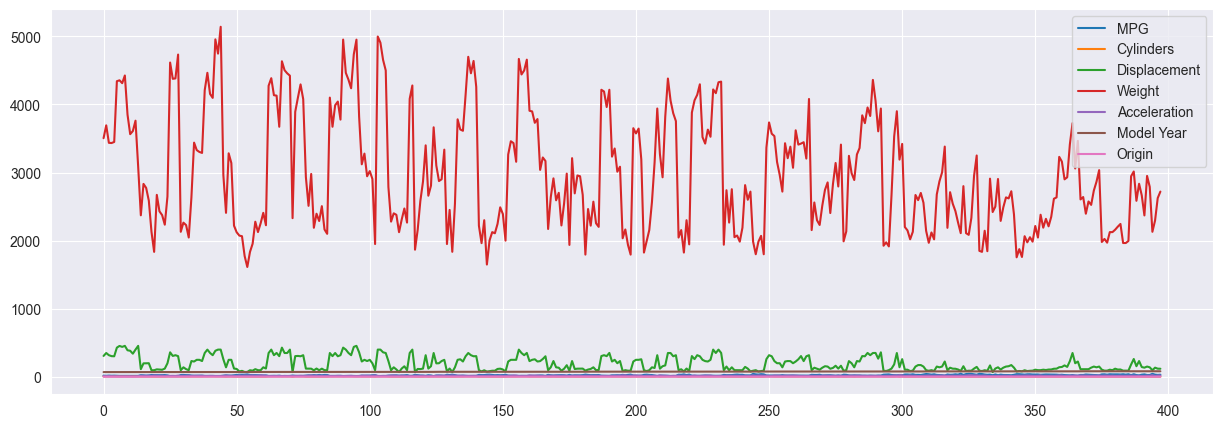

In [37]:
data.plot()

<Axes: >

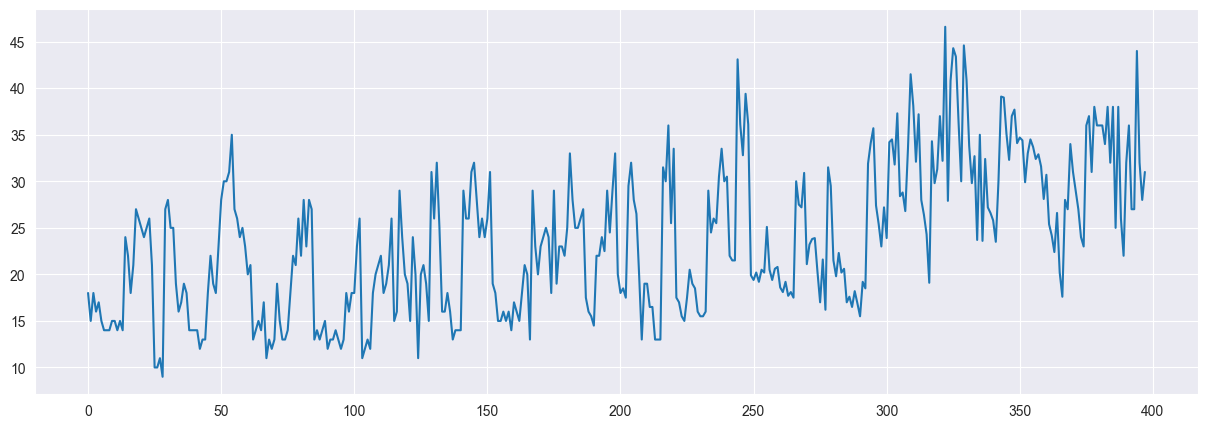

In [38]:
data['MPG'].plot()

<Axes: >

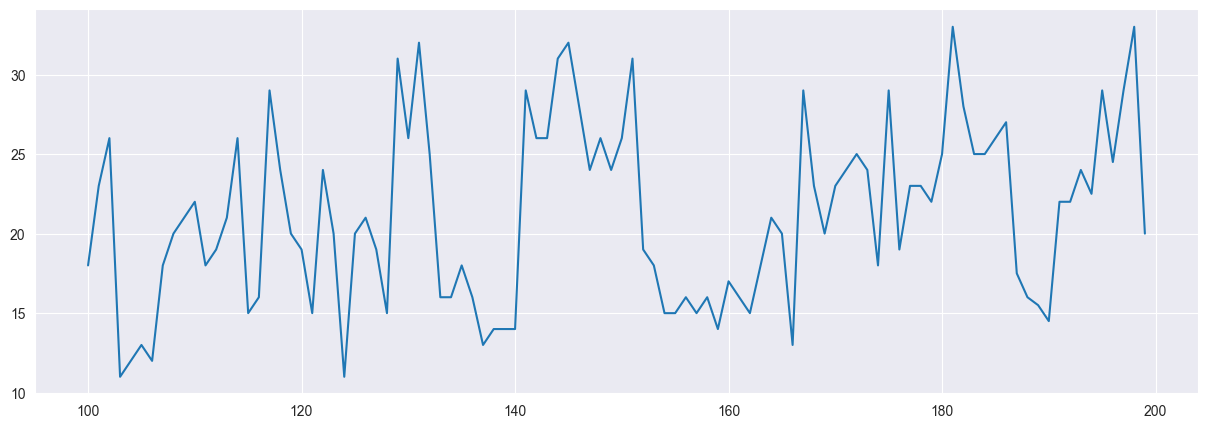

In [39]:
data['MPG'][100:200].plot()

You can also create barplots (stacked and not stacked), histograms and much more! Some examples are listed below. <br>
For more details visit: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

<Axes: >

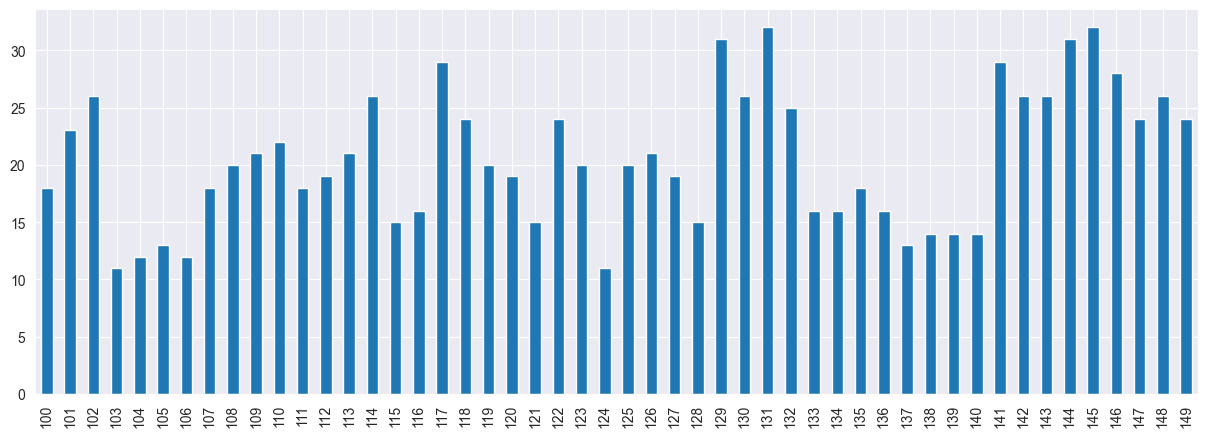

In [40]:
# create a bar plot of the MPG column in range 100 to 150 
data['MPG'][100:150].plot.bar()

<Axes: >

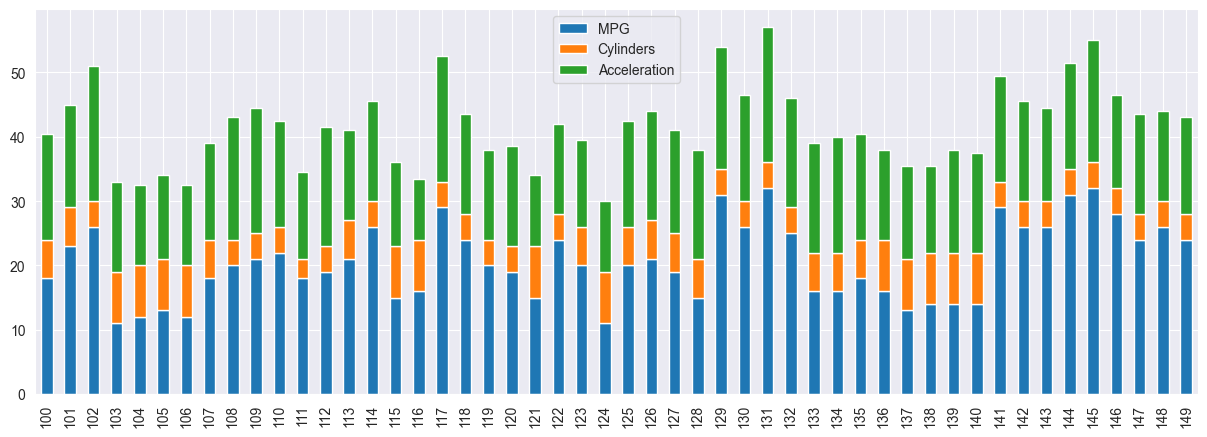

In [41]:
# create a stacked bar plot of the columns MPG, Cylinders and Acceleration in range 100 to 150 
data[['MPG','Cylinders','Acceleration']][100:150].plot.bar(stacked=True)

<Axes: >

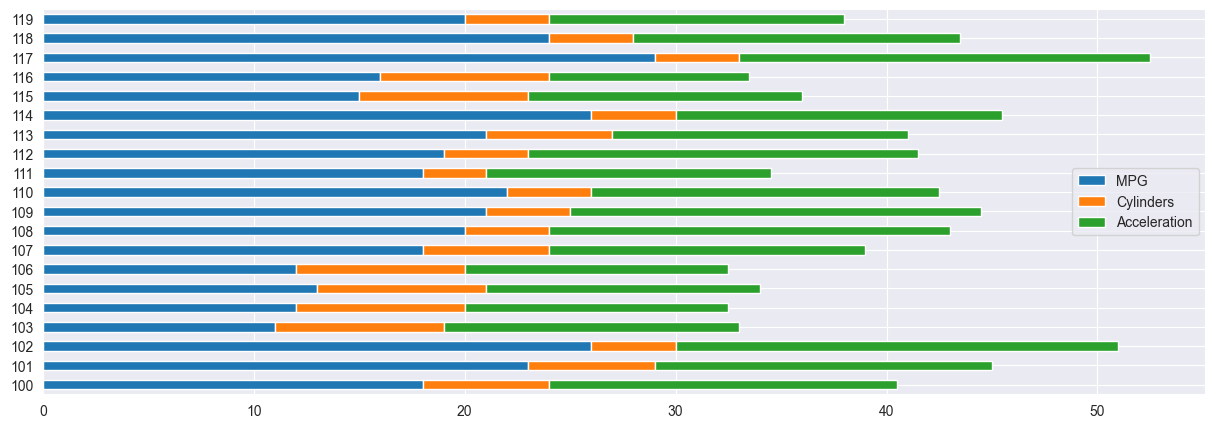

In [42]:
# create a stacked horizontal bar plot of the columns MPG, Cylinders and Acceleration in range 100 to 150 
data[['MPG','Cylinders','Acceleration']][100:120].plot.barh(stacked=True)

<Axes: ylabel='Frequency'>

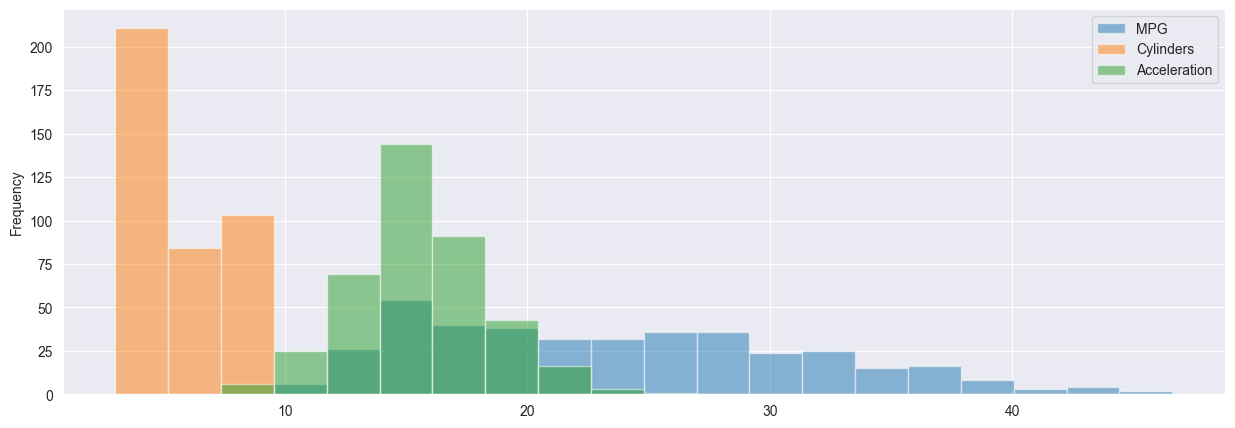

In [43]:
# create a histogramm of the columns MPG, Cylinders and Acceleration in one plot
data[['MPG','Cylinders','Acceleration']].plot.hist(alpha=0.5, bins=20)

array([[<Axes: title={'center': 'MPG'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Acceleration'}>, <Axes: >]], dtype=object)

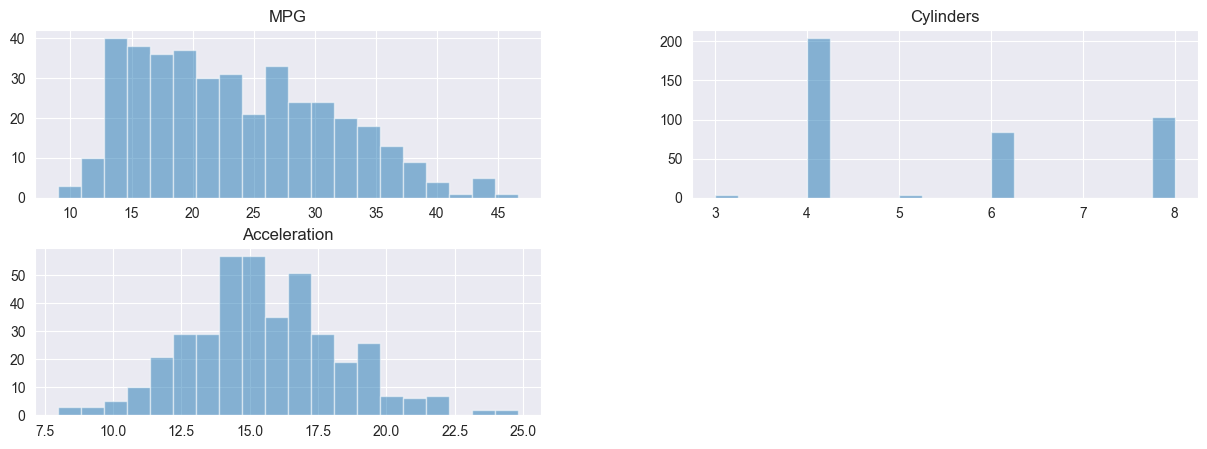

In [44]:
# create a histogramm of the columns MPG, Cylinders and Acceleration in seperate plots
data[['MPG','Cylinders','Acceleration']].hist(alpha=0.5, bins=20)

<Axes: >

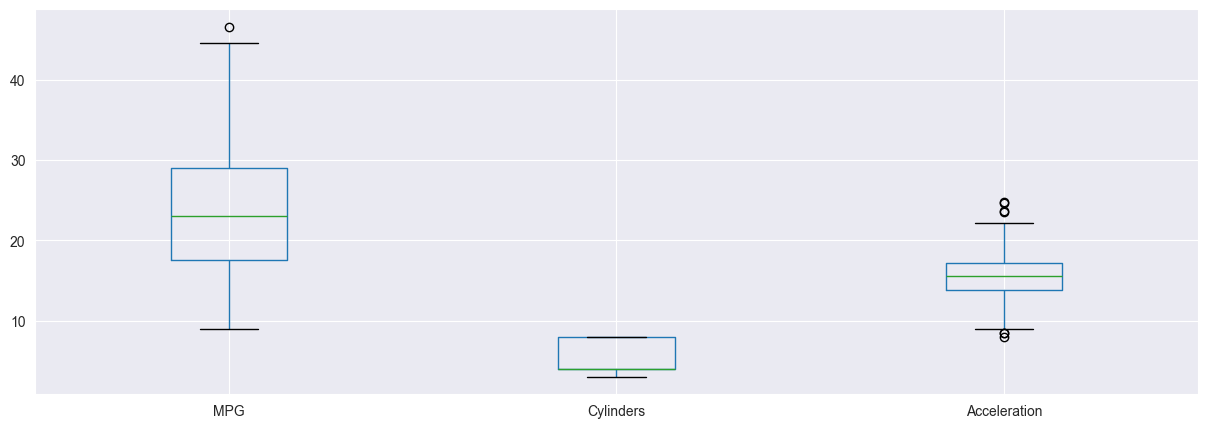

In [45]:
# create box plots of the attributes MPG, Cylinders and Acceleration 
data[['MPG','Cylinders','Acceleration']].boxplot()

### 1.8 Using Pandas Statistical Functions
You can use the `describe()` function on a `DataFrame` or a `Series` to print statistical informations of the data. 

You can also use the individual functions to print single statistical properties. See examples below:

In [46]:
data.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [47]:
# print single statistical properties by calling the count(), mean(), std(), min(), max() and quantile() functions
print('MPG count: ', data['MPG'].count())
print('MPG mean:  ', data['MPG'].mean())
print('MPG std:   ', data['MPG'].std())
print('MPG min:   ', data['MPG'].min())
print('MPG 25%:   ', data['MPG'].quantile(0.25))
print('MPG 50%:   ', data['MPG'].quantile(0.5))
print('MPG 75%:   ', data['MPG'].quantile(0.75))
print('MPG max:   ', data['MPG'].max())

MPG count:  398
MPG mean:   23.514572864321607
MPG std:    7.815984312565782
MPG min:    9.0
MPG 25%:    17.5
MPG 50%:    23.0
MPG 75%:    29.0
MPG max:    46.6


There is a lot of more statistical functions like:
- `var()`
- `sum()`
- `skew()`
- `kurt()`
- etc.

You can try them out by yourself. Just visit the pandas documentation and go to the DataFrame section. 

You will find detailed information about all posibilities in: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

## 2 Seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

On Seaborns official website, they state:

"*If matplotlib “ tries to make easy things easy and hard things possible ”, seaborn tries to make a well-defined set of hard things easy too.*"

In practice, the “well-defined set of hard things” includes:
- using default themes that are aesthetically pleasing.
- setting custom color palettes.
- making attractive statistical plots.
- easily and flexibly displaying distributions.
- visualizing information from matrices and DataFrames.

The last three points show the biggest advantages of Seaborn. Seaborn makes it very easy to “get to know” the data quickly and efficiently.

However, think about Seaborn as a complement, not a substitute, for Matplotlib. There are some tweaks that still require Matplotlib, and cant be covered through Seaborn.

On the following sections we will take a look at the following plotting functions of the Seaborn package:
- scatter plot
- boxplot
- heatmap
- histogram
- bar plot
- density plot
- joint distribution plot

### 2.1 Scatter Plot

You can print a scatter plot by using the `lmplot()` function of the Seaborn package. The column names are used to set axes arguments `x` and `y`. The DataFrame is used for the `data` argument. See an Example below:

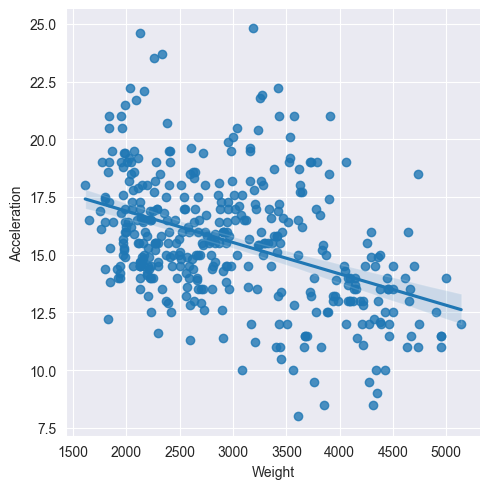

In [48]:
sns.lmplot(x='Weight', y='Acceleration', data = data)

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. We can tweak the `lmplot()` function by setting `fit_reg=False`. This removes the regression line, since we only want a scatter plot.


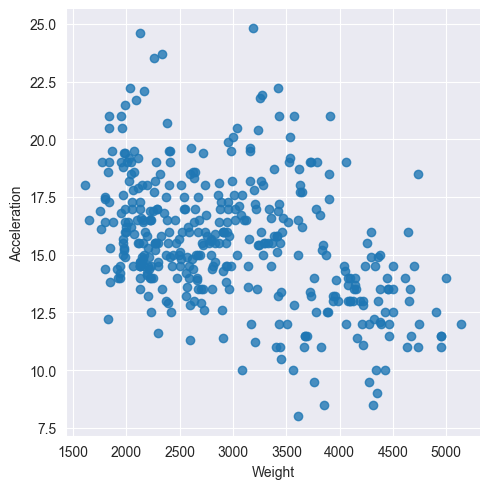

In [49]:
sns.lmplot(x='Weight', y='Acceleration', data=data, fit_reg=False)

### 2.2 Boxplot

You can print a boxplot by using the `boxplot()` function and using a DataFrame for the `data` argument. For example:

<Axes: >

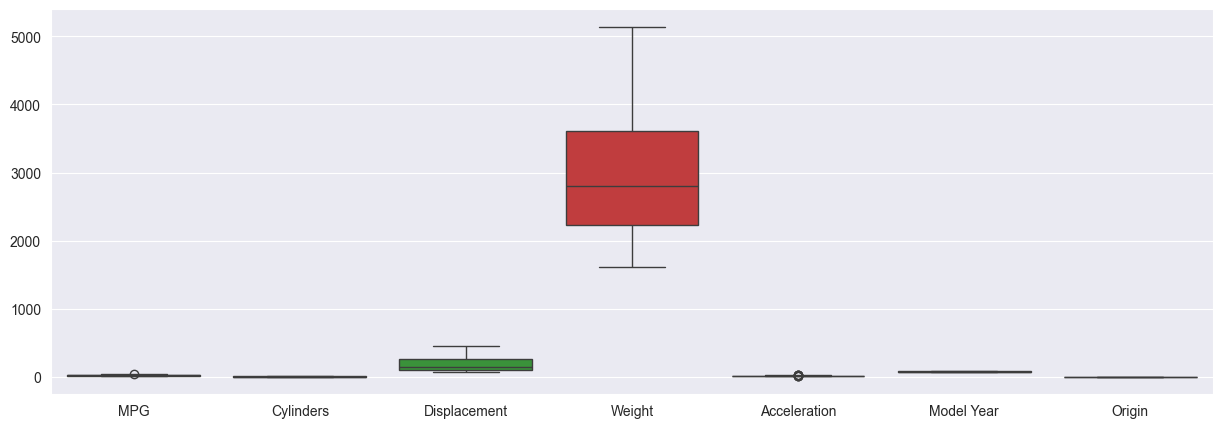

In [50]:
sns.boxplot(data=data)

Another example:

<Axes: >

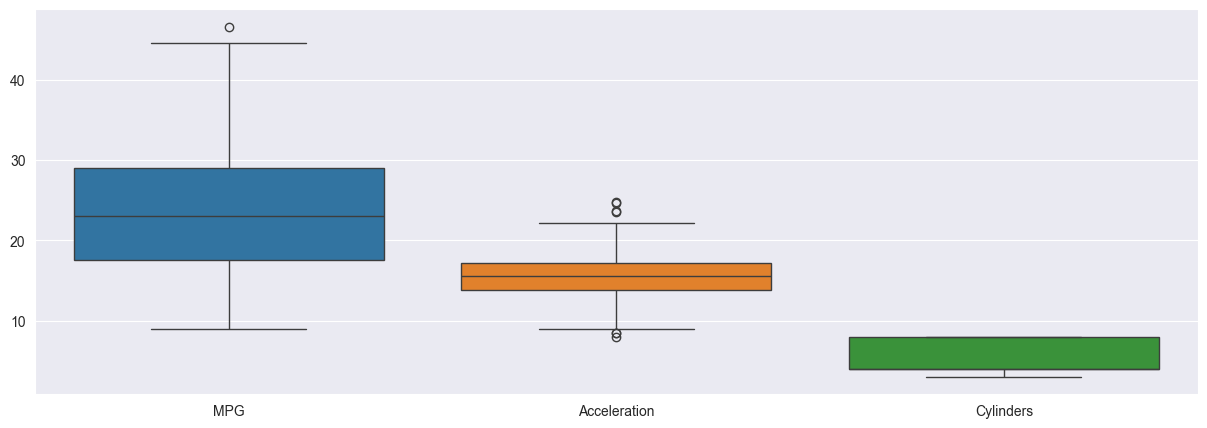

In [51]:
sns.boxplot(data=data[['MPG','Acceleration','Cylinders']])

### 2.3 Heatmap

You can use the `heatmap()` function to visualize matrix-like data. For example, we can calculate the correlations of the data set attributes by using the `corr()` function of the pandas package and then visualize the results by using the `heatmap()` function of the Seaborn package.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [53]:
#data['Horsepower']=data['Horsepower'].astype('float64')
data['Horsepower'] = pd.to_numeric(data['Horsepower'], errors='coerce')

<Axes: >

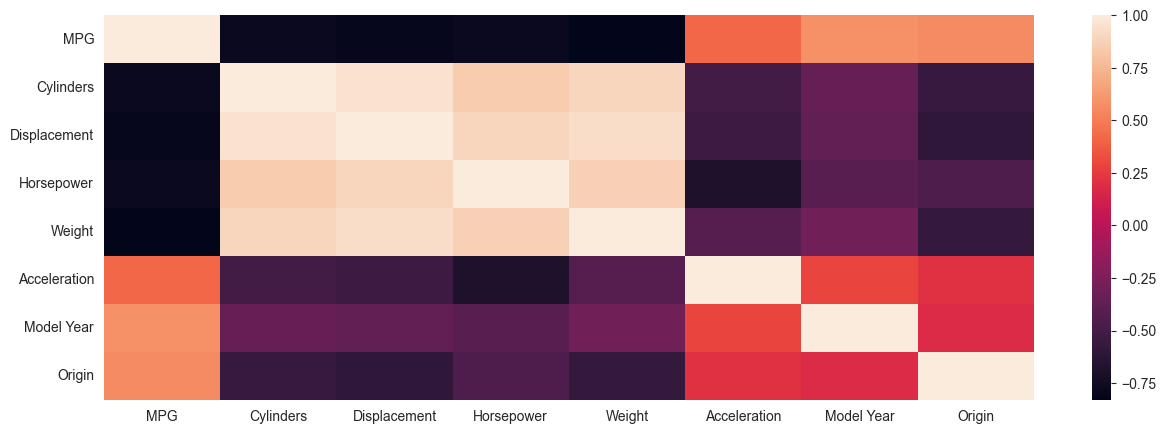

In [54]:
# calculate correlations
#data.describe()
corr = data.corr()

# print heatmap
sns.heatmap(corr)

The heatmap helps the visualize the correlation between attributes. As seen above.

### 2.4 Histogram
You can use the `displot()` function to visualize the distribution of numeric variables. For example:

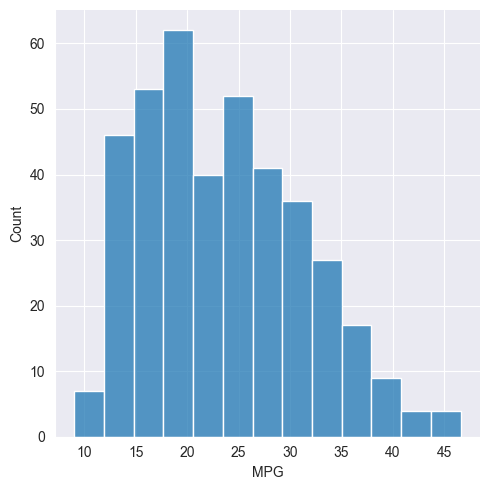

In [55]:
# distribution plot -> histogram
sns.displot(data['MPG'])

### 2.5 Bar Plot
You can use the `countplot()` function the visualize the distribution of categorial variables. Use the `x` argument to select a column for the barplot. 

<Axes: xlabel='Cylinders', ylabel='count'>

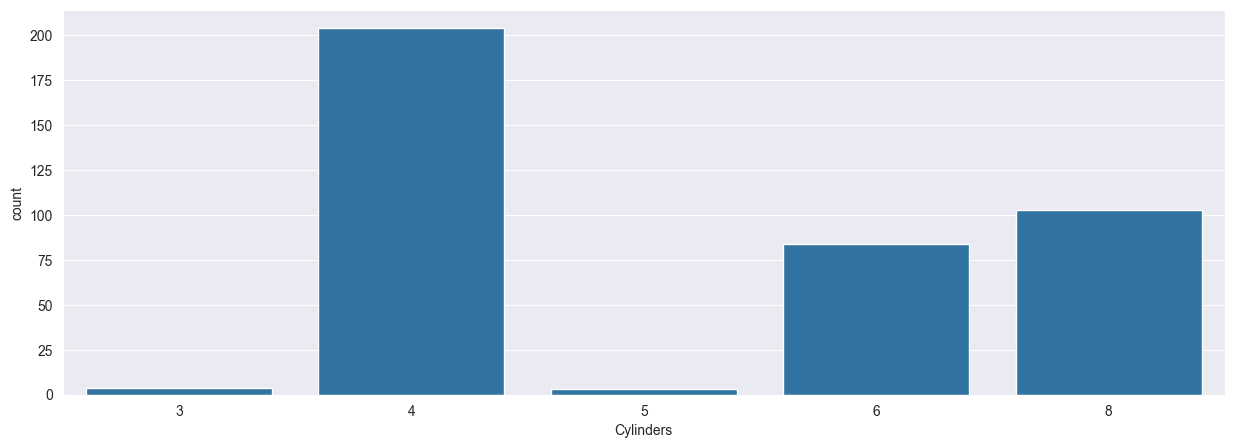

In [56]:
# count plot -> bar plot
sns.countplot(x = 'Cylinders', data = data )

### 2.6 Density Plot
You can use the `kdeplot()` function to display the distribution between two variables. Use selected DataFrame columns to set axes arguments `x` and `y`. See an Example below:

<Axes: xlabel='Weight', ylabel='Acceleration'>

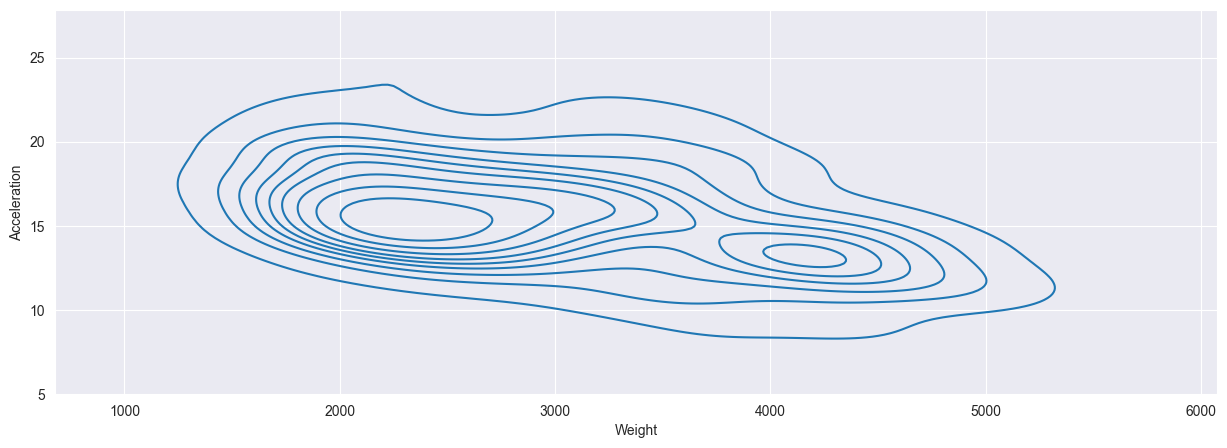

In [57]:
# density plot
sns.kdeplot(x=data['Weight'], y=data['Acceleration'])

### 2.7 Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms into a single plot to visualize bi-variate distributions. The column names are used to set axes arguments `x` and `y`. The DataFrame is used for the `data` argument. For example:

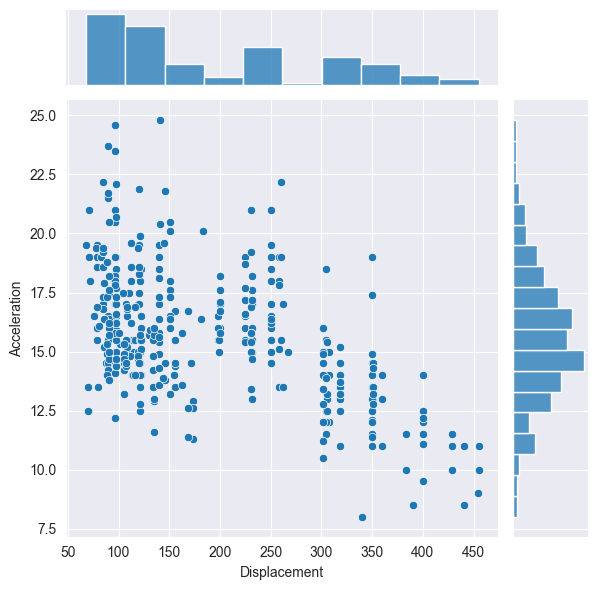

In [58]:
# joint distribution plot
sns.jointplot(x='Displacement', y='Acceleration', data=data)

## 3 Matplotlib

Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates). Here is the official description:

*“Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.”*

Since Matplotlib has very good documentation with beginner friendly tutorials, reference is made at this point to the processing of the following two articles:

**Usage Guide** : https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py 

**Sample Plots** : https://matplotlib.org/stable/tutorials/index.html

Please work through the usage guide and implement all code into your own jupyter notebook. Afterwards visit the Sample Plots page and look in detail into the examples for `Line Plot` and `Multiple subplots in one figure`. Try to implement your own line plots and multiple subplots by using the fuel consumption data which was used to describe pandas functions in this notebook.

Data Science as well as Machine Learning is a field with a big hands-on mentality. You can find a lot of good tutorials online for python packages such as pandas, matplotlib and seaborn, and also for machine learning related topics. Remember to do your own training alongside the course to understand the basic concepts of these packages.